In [45]:
import requests
import networkx as nx
from tqdm import tnrange, tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
def get_friends_ids(user_id):
    friends_url = 'https://api.vk.com/method/friends.get?user_id={}' 
    json_response = requests.get(friends_url.format(user_id)).json()
    if json_response.get('error'):
        if json_response.get('error')[u'error_msg'] != u'Access denied: user deactivated':
            print json_response.get('error')
        return list()
    return json_response[u'response']

In [21]:
graph = {}
friend_ids = get_friends_ids(31871401)
for friend_id in tqdm_notebook(friend_ids, desc='Loading graph'):
    graph[friend_id] = get_friends_ids(friend_id)

g = nx.Graph(directed=False)
for i in graph:
    g.add_node(i)
    for j in graph[i]:
        if i != j and i in friend_ids and j in friend_ids:
            g.add_edge(i, j)

In [111]:
pos = nx.spring_layout(g)

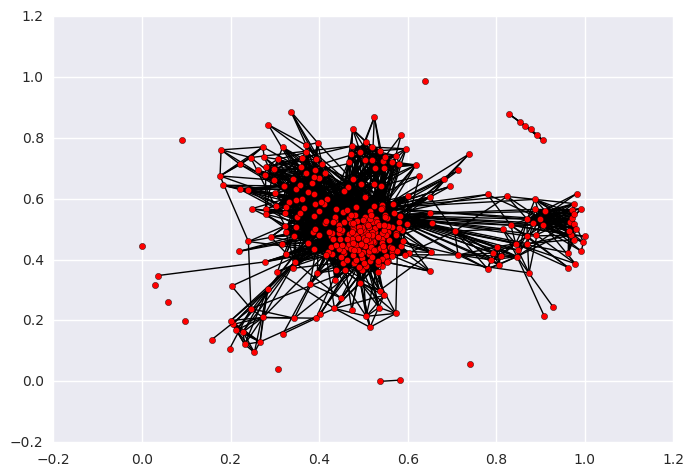

In [112]:
nx.draw_networkx(g, pos = pos, with_labels=False, node_size = 20)

In [113]:
# diameter
gcc = max(nx.connected_component_subgraphs(g), key=len)
print "Diameter = ", nx.diameter(gcc)
print "Average path length =", round(nx.average_shortest_path_length(gcc),2)
print "Clustering coefficient =", round(nx.transitivity(g), 2)

Diameter =  6
Average path length = 2.39
Clustering coefficient = 0.43


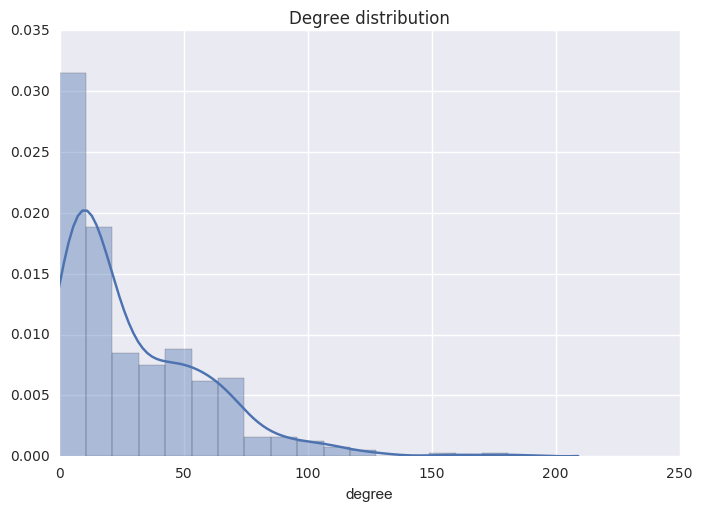

In [114]:
sns.distplot(g.degree().values())
plt.title("Degree distribution")
plt.xlabel('degree')
plt.xlim((0, 250))
plt.show()

In [115]:
c_degree = nx.degree_centrality(g)
c_close = nx.closeness_centrality(g)
c_betw = nx.betweenness_centrality(g)

In [116]:
sorted(c_betw, key = c_betw.get, reverse=True)[:5]

[14686221, 56119532, 5635220, 98780514, 31381547]

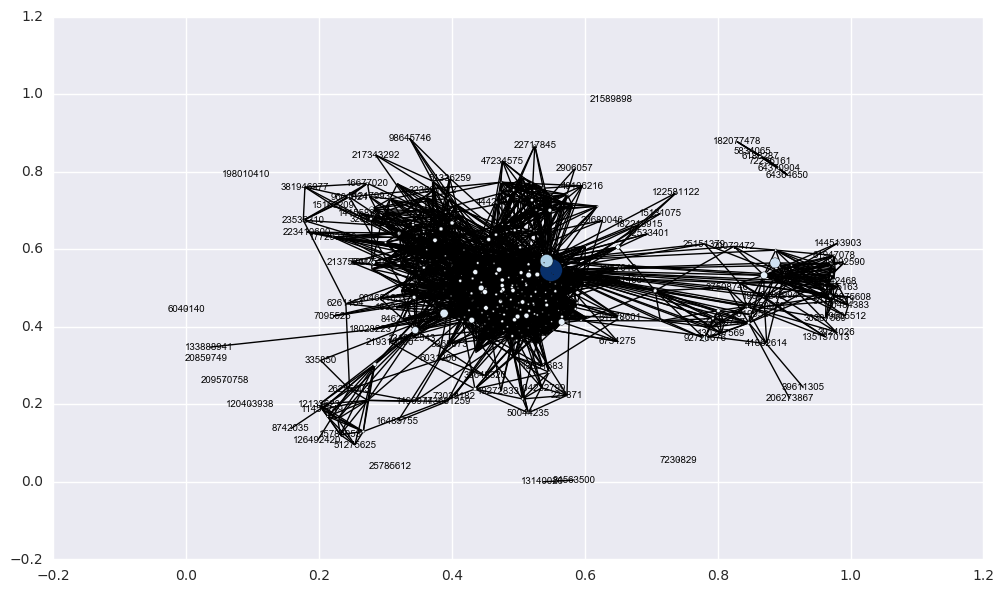

In [123]:
plt.figure(1, figsize=(12,7))
nx.draw_networkx(g,
          pos,
          node_size = [d*1000 for d in c_betw.values()],
          node_color=c_betw.values(),
          cmap=plt.cm.Blues,
          font_size = 5,
          with_labels = False)
nx.draw_networkx_labels(g, pos, labels, font_size=7)
plt.show()